# GOVERNMENT YIELD CURVE QUICK SNAPSHOT

In [102]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
import matplotlib as mtl 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tabulate import tabulate

## Bonds data as of 25/07/2025

In [145]:
bond_yields= {
    "Germany": {"2Y": 1.93,  "10Y": 2.71,  "30Y": 3.20 },
    "USA":     {"2Y": 3.92,  "10Y": 4.35 , "30Y": 4.93 },
    "Japan":   {"2Y": 0.85,  "10Y": 1.61 , "30Y": 3.06 },
    "UK":      {"2Y": 3.88,  "10Y": 4.63 , "30Y": 5.44 },
    "Italy":   {"2Y": 2.22,  "10Y": 3.57,  "30Y": 4.45 },
    "Spain":   {"2Y": 2.25,  "10Y": 3.31,  "30Y": 4.34 },
    "France":  {"2Y": 2.07,  "10Y": 3.39,  "30Y": 4.18 },
}

In [188]:
selected = 'UK'
df_yields = pd.DataFrame(bond_yields)
df_selected_country = df_yields[[selected]].T

df_tidy = df_selected_country.melt(var_name='Maturity', value_name='Yield')
df_tidy.insert(0, 'Country', selected)

df_tidy['Yield'] = df_tidy['Yield'].round(2)
df_tidy['Maturity'] = pd.Categorical(df_tidy['Maturity'], categories=['2Y', '10Y', '30Y'], ordered=True)
df_tidy = df_tidy.sort_values('Maturity')

print("\n" + "="*12 + " Full Yield Table (Wide Format) " + "="*12)
print(tabulate(df_yields.round(2), headers='keys', tablefmt='fancy_grid'))

print("\n" + "="*12 + f" Selected Country: {selected} " + "="*12)
print(tabulate(df_tidy, headers='keys', tablefmt='fancy_grid', showindex=False))


============ Full Yield Table (Wide Format) ============
╒═════╤═══════════╤═══════╤═════════╤══════╤═════════╤═════════╤══════════╕
│     │   Germany │   USA │   Japan │   UK │   Italy │   Spain │   France │
╞═════╪═══════════╪═══════╪═════════╪══════╪═════════╪═════════╪══════════╡
│ 2Y  │      1.93 │  3.92 │    0.85 │ 3.88 │    2.22 │    2.25 │     2.07 │
├─────┼───────────┼───────┼─────────┼──────┼─────────┼─────────┼──────────┤
│ 10Y │      2.71 │  4.35 │    1.61 │ 4.63 │    3.57 │    3.31 │     3.39 │
├─────┼───────────┼───────┼─────────┼──────┼─────────┼─────────┼──────────┤
│ 30Y │      3.2  │  4.93 │    3.06 │ 5.44 │    4.45 │    4.34 │     4.18 │
╘═════╧═══════════╧═══════╧═════════╧══════╧═════════╧═════════╧══════════╛

============ Selected Country: UK ============
╒═══════════╤════════════╤═════════╕
│ Country   │ Maturity   │   Yield │
╞═══════════╪════════════╪═════════╡
│ UK        │ 2Y         │    3.88 │
├───────────┼────────────┼─────────┤
│ UK        │ 10Y        

In [190]:
country_colors = {
    'USA':     'm',
    'Japan':   'r',
    'UK':      'c',
    'Italy':   'g',
    'Spain':   'orange',
    'Germany': 'k',
    'France':  'b'
}

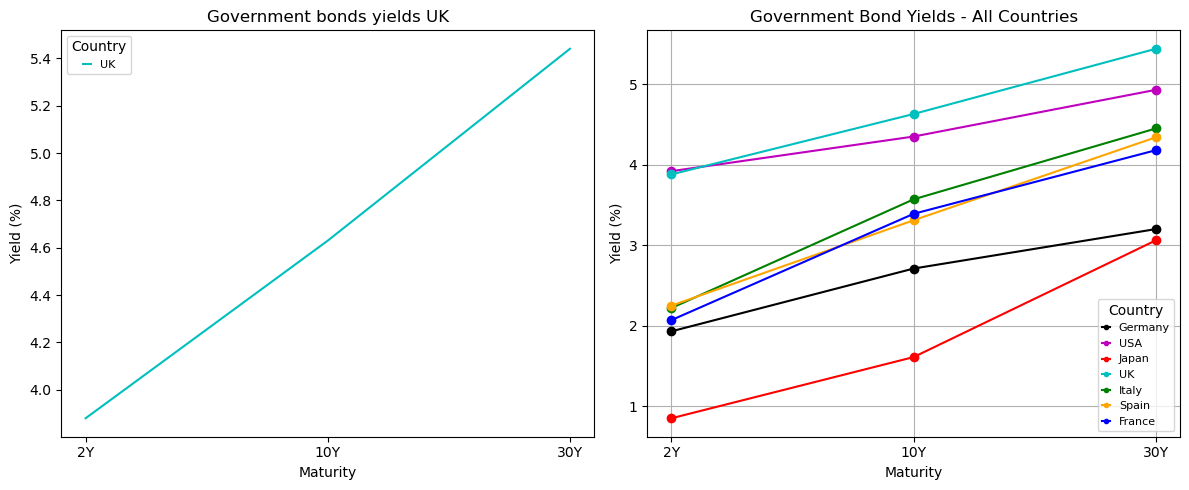

In [192]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

#1 selcted country
axes[0].plot(df_tidy['Maturity'],df_tidy['Yield'], label =selected, color = country_colors[selected])
axes[0].plot(df_yields = pd.DataFrame(bond_yields))
axes[0].set_title(f'Government bonds yields {selected}')
axes[0].set_xlabel('Maturity')
axes[0].set_ylabel('Yield (%)')
axes[0].legend(title='Country',fontsize=8, markerscale=0.5, handlelength=0.7)

#2 all countries |
for country in df_yields.columns:
    axes[1].plot(df_yields.index, df_yields[country], marker='o', label=country, color = country_colors[country])
    
axes[1].set_title('Government Bond Yields - All Countries')
axes[1].set_xlabel('Maturity')
axes[1].set_ylabel('Yield (%)')
axes[1].legend(title='Country',fontsize=8, markerscale=0.5, handlelength=0.7)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## SPREAD CALCUALTION USING DE AS BENCHMARK

In [195]:
df = pd.read_csv('DE-US-JP-GB-IT-ES-FR-10Y.csv')
df.set_index('observation_date', inplace = True)
df

,Germany,USA,Japan,UK,Italy,Spain,France
observation_date,,,,,,,
1956-05-01,6.40,3.07,NaN,NaN,NaN,NaN,NaN
1956-06-01,6.80,3.00,NaN,NaN,NaN,NaN,NaN
1956-07-01,6.80,3.11,NaN,NaN,NaN,NaN,NaN
1956-08-01,6.80,3.33,NaN,NaN,NaN,NaN,NaN
1956-09-01,7.00,3.38,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2025-02-01,2.41,4.45,1.37,4.51,3.58,3.10,3.15
2025-03-01,2.74,4.28,1.49,4.64,3.89,3.39,3.43
2025-04-01,2.51,4.28,1.31,4.58,3.71,3.23,3.26


In [297]:
spread = df[selected]- df['Germany']
spread = spread.dropna()
print(spread)

observation_date
1960-01-01   -1.17
1960-02-01   -1.00
1960-03-01   -0.81
1960-04-01   -0.73
1960-05-01   -0.71
              ... 
2025-02-01    2.10
2025-03-01    1.90
2025-04-01    2.07
2025-05-01    2.04
2025-06-01    2.00
Length: 786, dtype: float64


In [299]:
l = [] 
z = []
for i in spread.items():
    l.append(i[0][:4])
    for i in l: 
        if i not in z:
            z.append(i)
z

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 '2025']

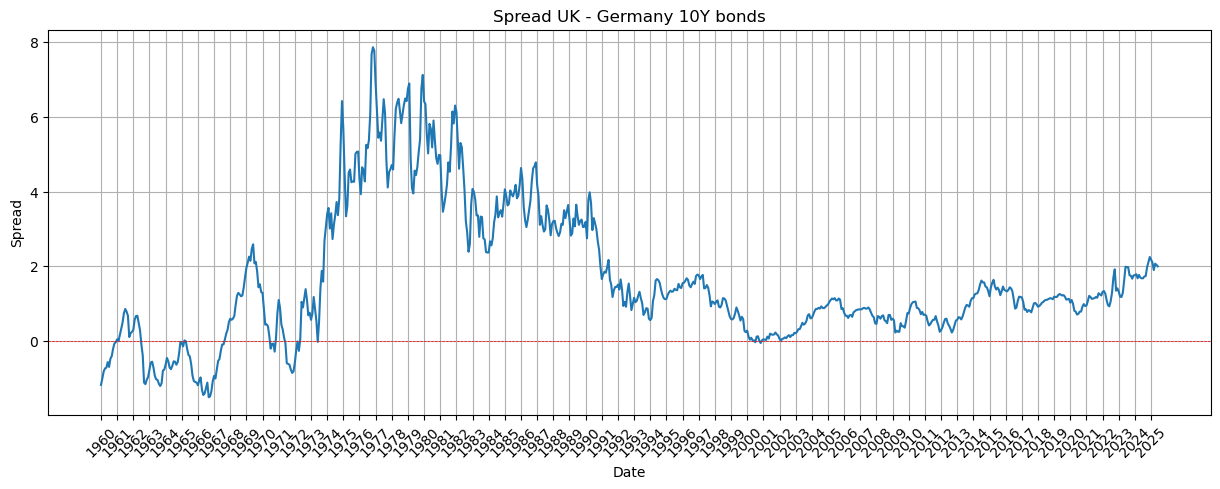

In [301]:
plt.figure(figsize=(15, 5))
plt.plot(spread.values, )
plt.axhline(y=0, c='r', linestyle='--', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title(f'Spread {selected} - Germany 10Y bonds')

plt.xticks(ticks=[i*12 for i in range(len(z))], labels=z, rotation=45)

plt.grid(True)
plt.show()